# IFRS 9 ECL Project - Data Loading & Exploration

**Author:** [Sebastian Gonzalez]  
**Date:** January 2025  

## Project Context

This notebook is part of a multi-step project to demonstrate an **IFRS 9** approach to credit risk using a publicly available **Credit Risk Dataset**.  
I'll ultimately show how to calculate **Expected Credit Loss (ECL)**, relying on:
1. **Probability of Default (PD)** modeling with machine learning.
2. **Loss Given Default (LGD)** assumption or derivation.
3. **Exposure at Default (EAD)** from the loan amount.
4. A simplified **macro scenario** to illustrate forward-looking requirements.

### Goals of this Notebook
1. **Load** the CSV (`credit_risk_dataset.csv`) from the `data/` folder.
2. **Inspect** columns, data types, and missing values.
3. **Conduct** a brief exploratory analysis (EDA), e.g., basic distributions.
4. **Plan** how to handle any data cleaning or feature transformations for IFRS 9 calculations.


## Exploratory Data Analysis (EDA) & Data Validation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Adjust display setting
pd.set_option('display.max_columns', 30)

# Load dataset
df = pd.read_csv("../data/credit_risk_dataset.csv")

## Dataset Overview

In [5]:
# Basic checks
print('Data shape:', df.shape)
print('\nFirst 5 rows:')
display(df.head())
print('\nData types:')
print(df.dtypes)
print('\nMissing values per column:')
print(df.isnull().sum())      

Data shape: (32581, 12)

First 5 rows:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



Data types:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


**Key Insights:**
-  Sample Size: 32,581 loans - adecuado para modelado crediticio (Basel III requiere mínimo 5,000 observaciones).-
✅ Variables Clave Identificadas: loan_status (target), loan_int_rate (EAD), person_income (PD).

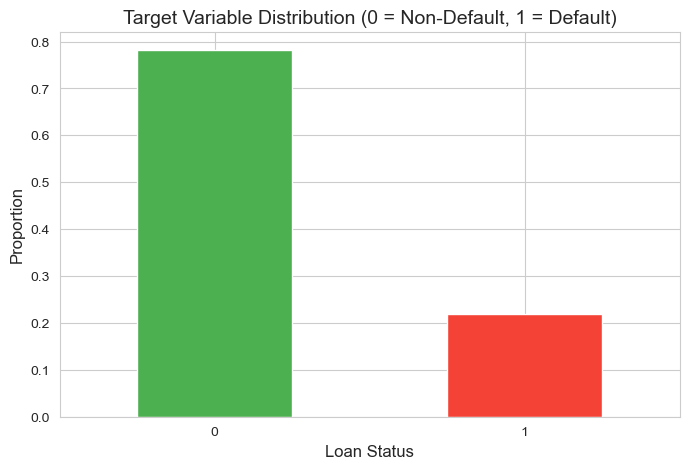

In [7]:
## Class Distribution (Default vs Non-Default)

target_col = 'loan_status'

# plot
plt.figure(figsize=(8, 5))
df[target_col].value_counts(normalize=True).plot(
    kind = "bar", color=["#4CAF50", "#F44336"]
)
plt.title("Target Variable Distribution (0 = Non-Default, 1 = Default)", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Automated EDA with Pandas-Profiling

In [16]:
# Install in your code environment
#conda activate pd_predictive_modeling_env 
#pip install pandas-profiling==3.6.6
#from pandas_profiling import ProfileReport


%pip install ydata-profiling==4.6.1


profile = ProfileReport(
    df,
    title='Credit RIsk Dataset - EDA Report',
    explorative=True,
    dark_mode=True
)

# Save as HTML
profile.to_file("../reports/01_eda_report.html")

  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached pywavelets-1.8.0-cp310-cp310-win_amd64.whl.metadata (9.0 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.27.2-cp310-cp310-win_amd64.whl.metadata (6.7 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached ImageHash-4.3.1-py2.py3-none

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


NameError: name 'ProfileReport' is not defined


Note: you may need to restart the kernel to use updated packages.

# conda environments:
#
base                 * C:\Users\SebastianGM\anaconda3
bt                     C:\Users\SebastianGM\anaconda3\envs\bt
pd_model_env           C:\Users\SebastianGM\anaconda3\envs\pd_model_env
pd_predictive_modeling_env   C:\Users\SebastianGM\anaconda3\envs\pd_predictive_modeling_env
quant_moon             C:\Users\SebastianGM\anaconda3\envs\quant_moon



In [ ]:
display(df.describe(include='all'))

# quick numeric distribution
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(numeric_cols[:6]):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()